## Final Project Submission

Please fill out:
* Student name: David Munyiri
* Student pace: part time
* Scheduled project review date/time: 27/07/2025 23:59:59
* Instructor name: Fidelis Wanalwenge
* Blog post URL:


## Data Exploration

In [1]:
#Load the data into a pandas Dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Aviation_df = pd.read_csv("data/Aviation_Data.csv")

C:\Users\david.munyiri\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#Check the size of the Aviation raw data
Aviation_df.shape

(90348, 31)

In [3]:
#View the all the columns of the raw data
Aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
#Get information on the data types and content in different columns
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
#View a snapshot of the raw data
Aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
#View statistics of columns of interest 
Aviation_df[['Make', 'Model','Aircraft.Category', 'Engine.Type', 'Injury.Severity','Aircraft.damage']].describe()

,Make,Model,Aircraft.Category,Engine.Type,Injury.Severity,Aircraft.damage
count,88826,88797,32287,81812,87889,85695
unique,8237,12318,15,13,109,4
top,Cessna,152,Airplane,Reciprocating,Non-Fatal,Substantial
freq,22227,2367,27617,69530,67357,64148


## Data Cleaning

Based on a quick exploration, the dataset appears to contain records of accidents and incidents involving various aircraft types, with **airplanes** being the most frequent category.

The focus of our analysis will be on accident records and remove rows missing:

- Make, Model, Aircraft Category
- Injury counts (fatal, serious, minor, uninjured)

which are critical to our eventual recommendation. This cleaning process ensures that the dataset remains relevant, consistent, and ready for further analysis.


In [7]:
# Filter only 'Accident' type investigations
accidents_df = Aviation_df[Aviation_df['Investigation.Type'] == 'Accident'].copy()

# Define critical columns to keep
critical_columns = [
    'Make', 'Model', 'Aircraft.Category',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]

# Drop rows with missing critical values
accidents_df.dropna(subset=critical_columns, inplace=True)

# Fill in missing aircraft damage field
accidents_df['Aircraft.damage'] = accidents_df['Aircraft.damage'].fillna('Unknown')

# Convert injuries to numeric
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in injury_cols:
    accidents_df[col] = pd.to_numeric(accidents_df[col], errors='coerce').fillna(0)


# Aggregate Accident Statistics by Aircraft Make and Model

In [8]:
#Define the columns that the data will be grouped by
grouped_df = accidents_df.groupby(['Make', 'Model'])

#Total risk factor counts
model_summary_df = grouped_df.agg(
    total_accidents=('Model', 'count'),
    total_fatalities=('Total.Fatal.Injuries', 'sum'),
    total_serious=('Total.Serious.Injuries', 'sum'),
    total_minor=('Total.Minor.Injuries', 'sum'),
    total_uninjured=('Total.Uninjured', 'sum'),
    total_destroyed=('Aircraft.damage', lambda x: (x == 'Destroyed').sum())
).reset_index()

# Total people onboard
model_summary_df['total_people'] = (
    model_summary_df['total_fatalities'] +
    model_summary_df['total_serious'] +
    model_summary_df['total_minor'] +
    model_summary_df['total_uninjured']
)

# Filter for valid data
model_summary_df = model_summary_df[
    (model_summary_df['total_people'] > 0) &
    (model_summary_df['total_accidents'] >= 10)
]

# Add a combined Make_Model label for easier charting
model_summary_df['make_model'] = model_summary_df['Make'] + ' ' + model_summary_df['Model']


In [9]:
# Check for missing values in critical columns
print(model_summary_df[['total_fatalities', 'total_serious', 'total_minor', 'total_destroyed', 'total_accidents']].isnull().sum())

# Look at models with very few accidents or zero values in critical columns
print(model_summary_df[model_summary_df['total_accidents'] < 10])


total_fatalities    0
total_serious       0
total_minor         0
total_destroyed     0
total_accidents     0
dtype: int64
Empty DataFrame
Columns: [Make, Model, total_accidents, total_fatalities, total_serious, total_minor, total_uninjured, total_destroyed, total_people, make_model]
Index: []


# Compute Risk Indexes

Based on the available dataset, we derive indexes that help us estimate and assign a safety evaluation of each aircraft model

- **Fatality Index** = Fatalities / Total People Onboard
- **Injury Index** = (All Injuries) / Total People
- **Damage Severity Index** = Weighted damage / Total Accidents


In [10]:
# Define fatality index
model_summary_df['fatality_index'] = model_summary_df['total_fatalities'] / model_summary_df['total_people']

#Define injury index
model_summary_df['injury_index'] = (
    model_summary_df['total_serious'] + model_summary_df['total_minor']
) / model_summary_df['total_people']

#Define damage severity index
model_summary_df['damage_severity_index'] = model_summary_df['total_destroyed'] / model_summary_df['total_accidents']
print(model_summary_df.columns)

Index(['Make', 'Model', 'total_accidents', 'total_fatalities', 'total_serious',
       'total_minor', 'total_uninjured', 'total_destroyed', 'total_people',
       'make_model', 'fatality_index', 'injury_index',
       'damage_severity_index'],
      dtype='object')


# Calculate Weighted Risk Score
## Define weights for each index — update these anytime to change importance or client priority/preference

- **Fatality Index** = 0.5
- **Injury Index** = 0.2
- **Damage Severity Index** = 0.3



In [22]:
# Define damage weights
WEIGHTS = {
    'fatality_index': 0.5,
    'damage_severity_index': 0.3,
    'injury_index': 0.2
}
# Compute Risk score using weighted fatality, damage_severity and Injury indices
model_summary_df['risk_score'] = (
    model_summary_df['fatality_index'] * WEIGHTS['fatality_index'] +
    model_summary_df['damage_severity_index'] * WEIGHTS['damage_severity_index'] +
    model_summary_df['injury_index'] * WEIGHTS['injury_index']
)
model_summary_df.tail()


,Make,Model,total_accidents,total_fatalities,total_serious,total_minor,total_uninjured,total_destroyed,total_people,make_model,fatality_index,injury_index,damage_severity_index,risk_score
7968,Schweizer,269C,11,0.0,6.0,1.0,9.0,2,16.0,Schweizer 269C,0.000000,0.437500,0.181818,0.142045
8114,Stinson,108,17,2.0,8.0,6.0,14.0,1,30.0,Stinson 108,0.066667,0.466667,0.058824,0.144314
8172,TAYLORCRAFT,BC12-D,18,2.0,9.0,2.0,14.0,0,27.0,TAYLORCRAFT BC12-D,0.074074,0.407407,0.000000,0.118519
8463,VANS,RV4,12,7.0,2.0,4.0,3.0,3,16.0,VANS RV4,0.437500,0.375000,0.250000,0.368750
8515,Vans,RV 6,10,2.0,5.0,2.0,8.0,1,17.0,Vans RV 6,0.117647,0.411765,0.100000,0.171176


In [23]:
model_summary_df.shape

(454, 14)

In [28]:
model_summary_df_cleaned = model_summary_df.dropna(subset=['risk_score'])
model_summary_df_cleaned.shape

(454, 14)

# Visualize Risk Index Distributions

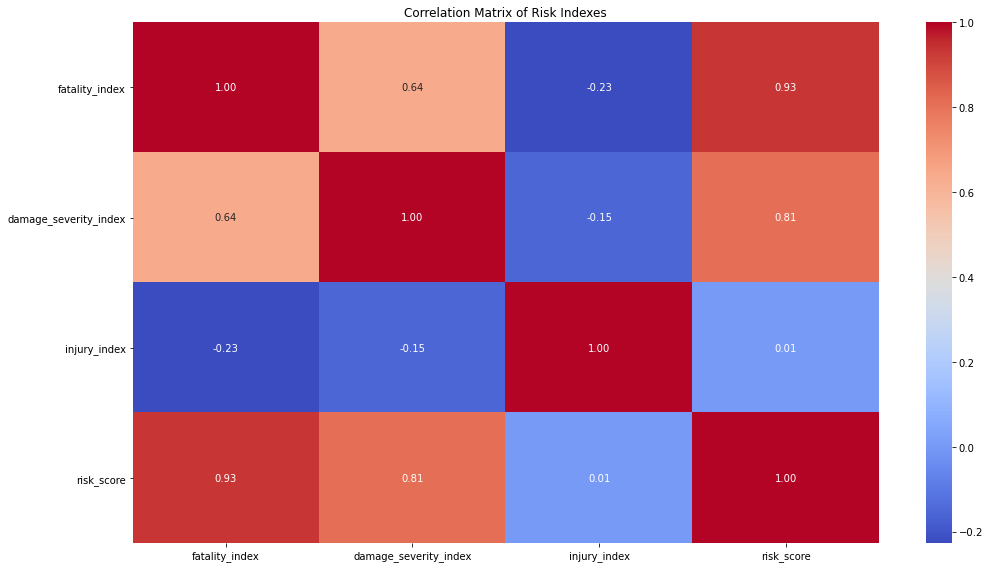

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    model_summary_df[['fatality_index', 'damage_severity_index', 'injury_index', 'risk_score']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Correlation Matrix of Risk Indexes")
plt.tight_layout()
plt.show()


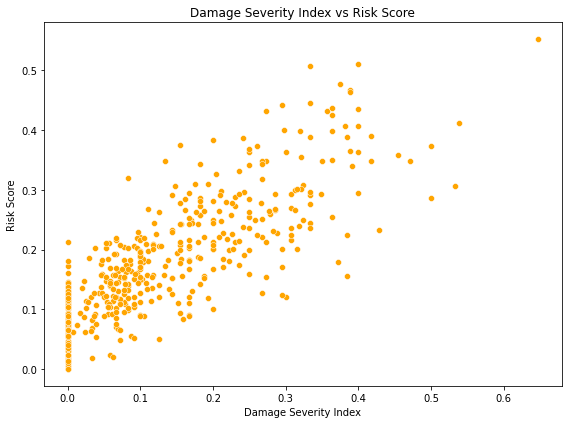

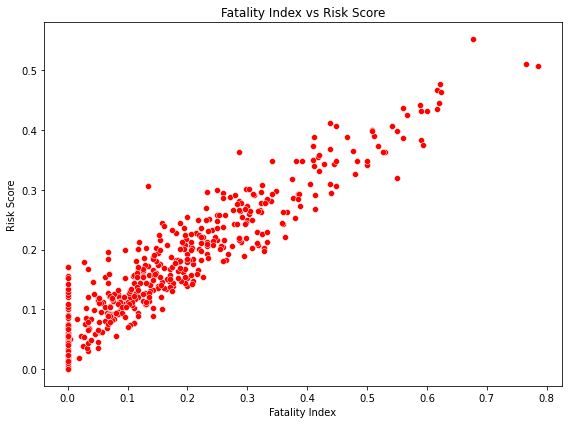

In [39]:
# Scatter plot: Damage Severity Index vs Risk Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=model_summary_df, x='damage_severity_index', y='risk_score', color='orange')
plt.title('Damage Severity Index vs Risk Score')
plt.xlabel('Damage Severity Index')
plt.ylabel('Risk Score')
plt.tight_layout()
plt.show()

# Scatter plot: Fatality Index vs Risk Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=model_summary_df, x='fatality_index', y='risk_score', color='red')
plt.title('Fatality Index vs Risk Score')
plt.xlabel('Fatality Index')
plt.ylabel('Risk Score')
plt.tight_layout()
plt.show()

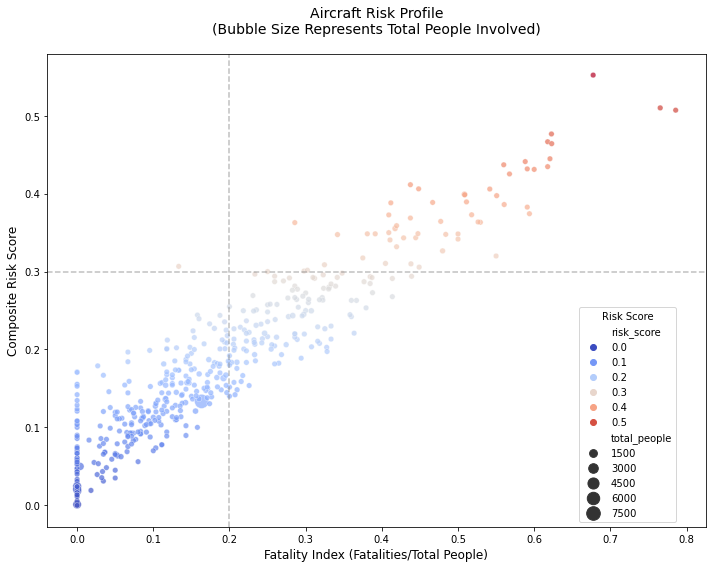

In [33]:
plt.figure(figsize=(10, 8))  # Increased figure size

# Create the scatter plot
scatter = sns.scatterplot(
    data=model_summary_df,
    x='fatality_index',
    y='risk_score',
    size='total_people',
    hue='risk_score',
    palette='coolwarm',
    sizes=(30, 200),
    alpha=0.7
)

# Add reference lines
plt.axhline(0.3, linestyle='--', color='gray', alpha=0.5)
plt.axvline(0.2, linestyle='--', color='gray', alpha=0.5)

# Customize titles and labels
plt.title("Aircraft Risk Profile\n(Bubble Size Represents Total People Involved)", pad=20, fontsize=14)
plt.xlabel("Fatality Index (Fatalities/Total People)", fontsize=12)
plt.ylabel("Composite Risk Score", fontsize=12)



# Method 2: If you really want bottom-left inside the plot
plt.legend(
     bbox_to_anchor=(0.80, 0.0),  # Inside bottom-left
     loc='lower left',
     borderaxespad=0.5,
     frameon=True,
     title='Risk Score'
 )
# Add tight_layout
plt.tight_layout() 

plt.show()

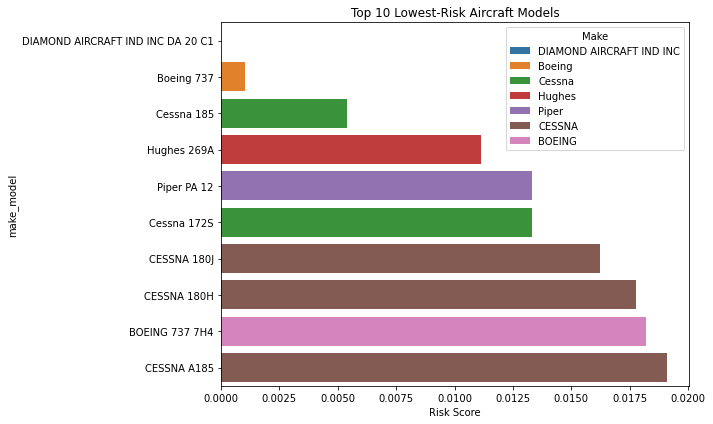

,Make,Model,total_accidents,total_people,fatality_index,damage_severity_index,injury_index,risk_score
3268,DIAMOND AIRCRAFT IND INC,DA 20 C1,11,16.0,0.0000,0.0000,0.0000,0.0000
1904,Boeing,737,18,2090.0,0.0000,0.0000,0.0053,0.0011
2805,Cessna,185,21,37.0,0.0000,0.0000,0.0270,0.0054
4686,Hughes,269A,11,18.0,0.0000,0.0000,0.0556,0.0111
6638,Piper,PA 12,18,30.0,0.0000,0.0000,0.0667,0.0133
2764,Cessna,172S,13,15.0,0.0000,0.0000,0.0667,0.0133
2151,CESSNA,180J,21,37.0,0.0000,0.0000,0.0811,0.0162
2150,CESSNA,180H,23,45.0,0.0000,0.0000,0.0889,0.0178
1326,BOEING,737 7H4,14,1655.0,0.0006,0.0000,0.0894,0.0182
2286,CESSNA,A185,30,55.0,0.0182,0.0333,0.0000,0.0191


In [15]:
top_10 = model_summary_df.sort_values('risk_score').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10,
    x='risk_score',
    y='make_model',
    hue='Make',
    dodge=False
)
plt.title("Top 10 Lowest-Risk Aircraft Models")
plt.xlabel("Risk Score")
plt.ylabel("make_model")
plt.tight_layout()
plt.show()

# Display summary table with key stats
top_10[[
    'Make', 'Model', 'total_accidents', 'total_people',
    'fatality_index', 'damage_severity_index', 'injury_index', 'risk_score'
]].round(4)
